In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import scipy.stats as stats

In [2]:
zillow_data1= "data_sources/zillow_data/zillow_medianhome_matched.csv"
zillow_pd= pd.read_csv(zillow_data1)
zillow_pd.head()

,Zip,City,County,Type,Area,Value,Year
0,76574,Taylor,Williamson County,Rural,North,106847.78,2011
1,76574,Taylor,Williamson County,Rural,North,106776.56,2012
2,76574,Taylor,Williamson County,Rural,North,107119.61,2013
3,76574,Taylor,Williamson County,Rural,North,107849.07,2014
4,76574,Taylor,Williamson County,Rural,North,109096.49,2015


In [3]:
census_data1= "data_sources/census_data/combined_census_cleaned.csv"
census_pd= pd.read_csv(census_data1)
merge_data= pd.merge(zillow_pd,census_pd, on=["Zip","Year"])
merge_data = merge_data.drop(["City_y"], axis=1)
merge_data= merge_data.rename(columns={"City_x":"City", "Year_x":"Zillow Years", "Year_y":"Census Years"})
merge_data

,Zip,City,County,Type,Area,Value,Year,Total-Population,Hispanic,White,Black,Native,Asian,Other,Total,Diversity Index
0,76574,Taylor,Williamson County,Rural,North,106847.78,2011,17213,35.3,54.0,8.6,0.0,1.8,0.3,100.0,0.576062
1,76574,Taylor,Williamson County,Rural,North,106776.56,2012,17775,34.5,53.6,8.9,0.0,2.0,1.0,100.0,0.585258
2,76574,Taylor,Williamson County,Rural,North,107119.61,2013,18037,36.8,51.1,9.8,0.0,0.2,2.2,100.1,0.593363
3,76574,Taylor,Williamson County,Rural,North,107849.07,2014,18135,35.3,51.9,9.9,0.0,0.4,2.5,100.0,0.595588
4,76574,Taylor,Williamson County,Rural,North,109096.49,2015,18281,41.4,46.0,9.6,0.1,0.7,2.1,99.9,0.607297
5,76574,Taylor,Williamson County,Rural,North,111104.17,2016,18502,35.4,49.3,11.2,0.1,0.8,3.2,100.0,0.618002
6,76574,Taylor,Williamson County,Rural,North,113822.62,2017,18939,40.3,47.2,9.3,0.1,0.6,2.6,100.1,0.605445
7,78602,Bastrop,Bastrop County,Rural,East,115163.33,2011,24532,21.8,65.8,9.7,0.2,0.8,1.6,99.9,0.509779
8,78602,Bastrop,Bastrop County,Rural,East,115852.60,2012,25594,23.3,64.5,9.2,0.4,0.8,1.8,100.0,0.520818
9,78602,Bastrop,Bastrop County,Rural,East,116555.39,2013,26278,26.0,61.8,8.9,0.4,0.9,1.9,99.9,0.542097


In [4]:
Urban= merge_data[merge_data["Type"]=="Urban"]
Rural= merge_data[merge_data["Type"]=="Rural"]
Suburban= merge_data[merge_data["Type"]=="Suburban"]
Urban.head()

,Zip,City,County,Type,Area,Value,Year,Total-Population,Hispanic,White,Black,Native,Asian,Other,Total,Diversity Index
210,78701,Austin,Travis County,Urban,Central,247179.44,2011,5084,12.0,73.1,7.6,0.0,6.6,0.7,100.0,0.441058
211,78701,Austin,Travis County,Urban,Central,248615.10,2012,5642,14.1,70.3,5.7,0.0,8.0,1.9,100.0,0.475900
212,78701,Austin,Travis County,Urban,Central,250772.55,2013,5915,13.8,70.7,5.2,0.0,7.7,2.6,100.0,0.471798
213,78701,Austin,Travis County,Urban,Central,254295.37,2014,6188,14.5,68.4,4.9,0.0,9.5,2.6,99.9,0.499017
214,78701,Austin,Travis County,Urban,Central,259944.74,2015,7051,14.1,69.3,3.8,0.2,9.4,3.2,100.0,0.488562


In [5]:
import warnings
warnings.filterwarnings('ignore')

In [6]:
%matplotlib inline
import pandas as pd
import scipy.stats as stats

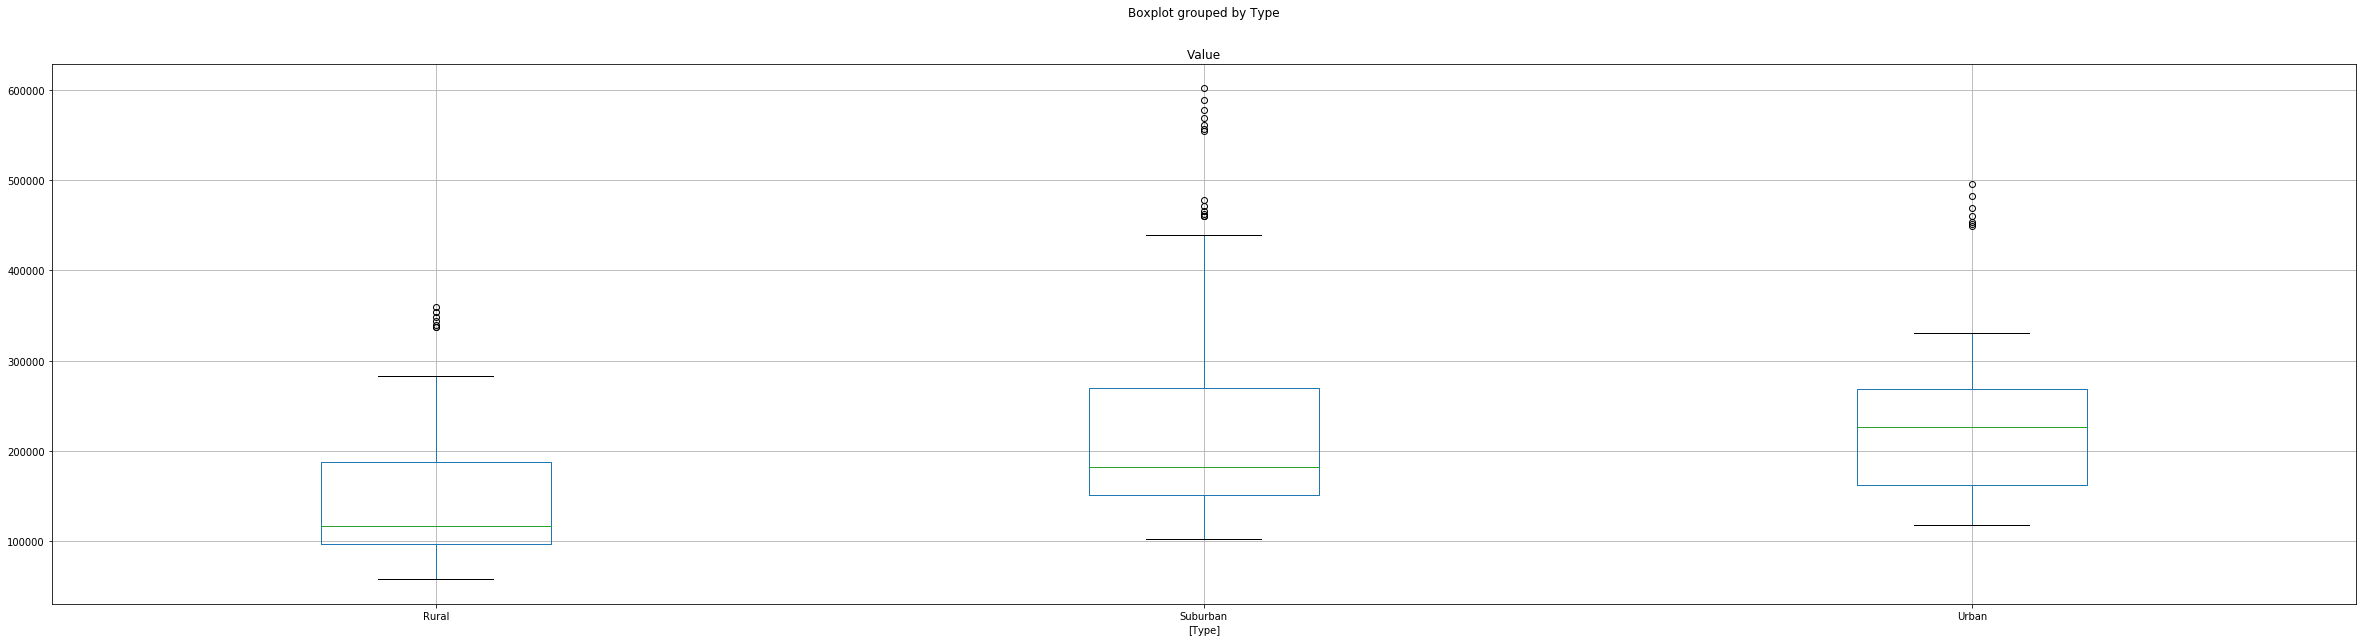

In [7]:
compare_bp= merge_data.boxplot("Value", by=["Type"],figsize=(40,10))
plt.savefig("output_images/boxplot_godwin.png")

In [8]:
urban_com= merge_data[merge_data["Type"]== "Urban"][["Diversity Index","Value"]]
sub_com= merge_data[merge_data["Type"]== "Suburban"][["Diversity Index","Value"]]
rural_com= merge_data[merge_data["Type"]== "Rural"][["Diversity Index","Value"]]

In [9]:
stats.f_oneway(urban_com,sub_com,rural_com)

F_onewayResult(statistic=array([12.84756769, 20.45557918]), pvalue=array([3.62029435e-06, 2.88644238e-09]))

### Since the p-value indicate that the p-value is less than .05, it rejects the null hypothesis and support our hypothesis that there is a big correlation between property value and diversity. I took it further and went into how it affects different city types and from the looks of it, it seems like rural areas takes the most hit when it comes to how diversity index affects the property value but overall, it indicates that as diversity index increases, property value across all city types decreases.